Problem -Christmas Case Study
Instructions Mr. & Mrs. Thomas have told their child Rupert that if he does not act like a good boy and sleep early on Christmas, this year Santa will not give him a gift. Rupert wants to verify if his parents are telling the truth. How can he verify that?

Hint: Rupert has collected data from the neighbourhood houses about the behaviour of the children last year and whether Santa has given them gifts or not. He has collected the following data.

House No. represents House No. or Plot No.

Letter represents whether the child has written a letter to ask for a gift from Santa.

Been Naughty represents whether the child has been naughty throughout the year.

Age represents the age of the child.

Awake/Sleep represents whether the child was awake or asleep at midnight.

Gift represents whether Santa has provided them gifts.

Now Rupert has noted down his activity throughout the year and his plan to stay awake at night. His response for the above table would be,

House No. Letter Been Naughty Age Awake/Sleep 15 Yes Yes 12 Awake Can you help Rupert predict whether he will receive a gift?

If he sleeps at midnight on Christmas, will he receive the Gift?

Can you advise Rupert anything so that he receives a Gift next year?

In [38]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [19]:
data = pd.read_excel("Rupert's Data.xlsx")
data.head(10)

,House No.,Letter,Been Naughty,Age,Awake/Sleep,Gift
0,1,Yes,No,12,Awake,No
1,2,No,No,18,Sleep,No
2,3,Yes,No,14,Sleep,Yes
3,4,Yes,Yes,13,Awake,No
4,5,Yes,Yes,14,Sleep,No
5,6,No,No,13,Sleep,Yes
6,7,Yes,No,17,Awake,No
7,8,No,Yes,12,Sleep,Yes
8,9,No,Yes,16,Sleep,No
9,10,Yes,Yes,17,Awake,No


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   House No.     10 non-null     int64 
 1   Letter        10 non-null     object
 2   Been Naughty  10 non-null     object
 3   Age           10 non-null     int64 
 4   Awake/Sleep   10 non-null     object
 5   Gift          10 non-null     object
dtypes: int64(2), object(4)
memory usage: 608.0+ bytes


In [21]:
data.describe()

,House No.,Age
count,10.00000,10.000000
mean,5.50000,14.600000
std,3.02765,2.221111
min,1.00000,12.000000
25%,3.25000,13.000000
50%,5.50000,14.000000
75%,7.75000,16.750000
max,10.00000,18.000000


In [22]:
data.shape

(10, 6)

In [23]:
df=data.copy()

In [24]:
df.columns= (c.replace(" ","_") for c in df.columns)

In [25]:
df.drop('House_No.',axis=1,inplace=True)

In [26]:
df.Letter.replace(('Yes','No'),(1,0),inplace=True)

In [27]:
df.Been_Naughty.replace(('Yes','No'),(0,1),inplace =True)

In [28]:
df.Gift.replace(("Yes","No"),(1,0),inplace=True)

In [30]:
df.columns = (c.replace('/','_') for c in df.columns)

In [31]:
df.Awake_Sleep.replace(('Awake','Sleep'),(0,1), inplace=True)

In [32]:
df.head(10)

,Letter,Been_Naughty,Age,Awake_Sleep,Gift
0,1,1,12,0,0
1,0,1,18,1,0
2,1,1,14,1,1
3,1,0,13,0,0
4,1,0,14,1,0
5,0,1,13,1,1
6,1,1,17,0,0
7,0,0,12,1,1
8,0,0,16,1,0
9,1,0,17,0,0


In [33]:
num_col=df.columns.tolist()

In [34]:
scalar = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scalar.fit_transform(subset)

In [35]:
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [36]:
subset_scaled_df.head(10)

,Letter,Been_Naughty,Age,Awake_Sleep,Gift
0,0.816497,1.0,-1.233905,-1.224745,-0.654654
1,-1.224745,1.0,1.613569,0.816497,-0.654654
2,0.816497,1.0,-0.284747,0.816497,1.527525
3,0.816497,-1.0,-0.759326,-1.224745,-0.654654
4,0.816497,-1.0,-0.284747,0.816497,-0.654654
5,-1.224745,1.0,-0.759326,0.816497,1.527525
6,0.816497,1.0,1.138990,-1.224745,-0.654654
7,-1.224745,-1.0,-1.233905,0.816497,1.527525
8,-1.224745,-1.0,0.664411,0.816497,-0.654654
9,0.816497,-1.0,1.138990,-1.224745,-0.654654


Number of Clusters: 1 	Average Distortion: 2.2207584295155014
Number of Clusters: 2 	Average Distortion: 1.7617980305516365
Number of Clusters: 3 	Average Distortion: 1.4264901998463235
Number of Clusters: 4 	Average Distortion: 1.2437706912011008
Number of Clusters: 5 	Average Distortion: 1.038239344102151
Number of Clusters: 6 	Average Distortion: 0.8365017221143093
Number of Clusters: 7 	Average Distortion: 0.6111070529789158
Number of Clusters: 8 	Average Distortion: 0.3953851256399577


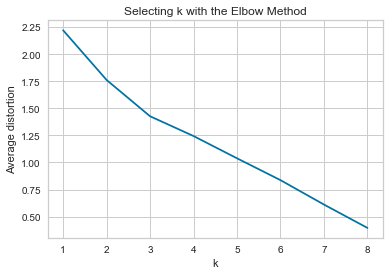

In [40]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

For n_clusters = 2, the silhouette score is 0.22202164313101633)
For n_clusters = 3, the silhouette score is 0.2781748868274453)
For n_clusters = 4, the silhouette score is 0.21575306441225614)
For n_clusters = 5, the silhouette score is 0.17088124020164153)
For n_clusters = 6, the silhouette score is 0.13538626812131271)
For n_clusters = 7, the silhouette score is 0.07237225418873099)
For n_clusters = 8, the silhouette score is 0.04357980411482034)
For n_clusters = 9, the silhouette score is 0.012732781116828037)


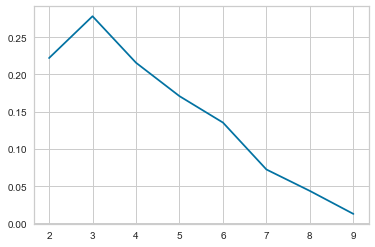

In [41]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

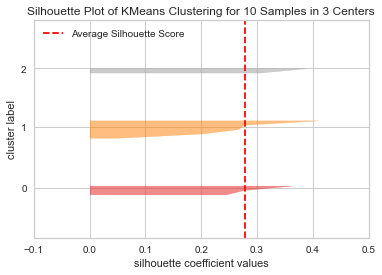

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

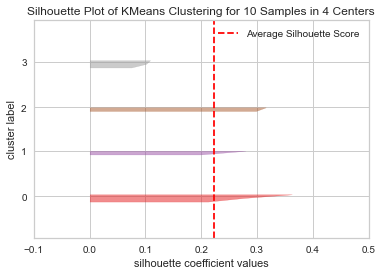

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [43]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [44]:
# let's take 3 as number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=0)

In [45]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

In [46]:
cluster_profile = df.groupby("K_means_segments").mean()

In [47]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Gift"].count().values
)

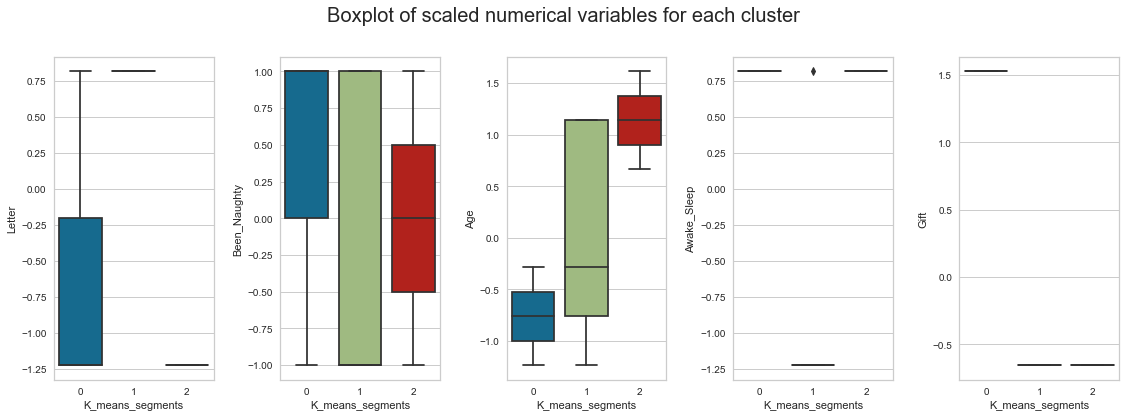

In [48]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [49]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Letter,Been_Naughty,Age,Awake_Sleep,Gift,count_in_each_segments
K_means_segments,,,,,,
0,0.333333,0.666667,13.000000,1.000000,1.000000,3
1,1.000000,0.400000,14.600000,0.200000,0.000000,5
2,0.000000,0.500000,17.000000,1.000000,0.000000,2


In [50]:
pd.crosstab(df.Awake_Sleep,df.Gift,margins=True)

Gift,0,1,All
Awake_Sleep,,,
0,4,0,4
1,3,3,6
All,7,3,10


In [51]:
pd.crosstab(df.Been_Naughty,df.Gift,margins=True)

Gift,0,1,All
Been_Naughty,,,
0,4,1,5
1,3,2,5
All,7,3,10


In [52]:
pd.crosstab(df.Age,df.Gift,margins=True)

Gift,0,1,All
Age,,,
12,1,1,2
13,1,1,2
14,1,1,2
16,1,0,1
17,2,0,2
18,1,0,1
All,7,3,10


### Observation and Recomendation
Can you help Rupert predict whether he will receive a gift?
Unfortunately no as he does not falls in Cluster 0. That cluster are made up of kids who sleep and are younger than 14.

### If he sleeps at midnight on Christmas, will he receive the Gift?
Most likely he will receive a gift if he sleeps the night and be a good boy. since the two main factors that effect these are sleep on Christmas eve and Age and being naughty.

### Can you advise Rupert anything so that he receives a Gift next year?
Yes, he will need sleep on christmas eve and maybe he would receive a gift next year. But santa seems to favor children under the age of 14. So as he grows older even if he sleeps the night before christmas he may still not receive his gift.